# PROJET 4

# Importation Library

In [1]:
#Importation des librairies
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st
from datetime import date
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib import pyplot
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Importation Dataset

In [2]:
data = pd.read_csv("../data/data_analyse_clean.csv")

In [3]:
data.head()

,id_produit,date,id_session,id_client,genre,a_naissance,prix,categorie
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0


In [4]:
# Convert format "date" de objet à datetimes 
data['date']=pd.to_datetime(data['date'])
# Ajouter une colonne "annee_mois"
data['annee_mois'] = data['date'].dt.to_period('M')
data.head()

,id_produit,date,id_session,id_client,genre,a_naissance,prix,categorie,annee_mois
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0,2021-04
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0,2022-02
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0,2021-09
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0,2021-10
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0,2021-07


In [5]:
data["categorie"]=data["categorie"].astype(str)

In [6]:
# Verification année
data['date'].dt.year.value_counts()

2021    277846
2022     58867
Name: date, dtype: int64

### Creation variable additonelle pour analyse

In [7]:
# Création colonne Age client
data['age'] = 2021 - data.a_naissance
data['age'].describe()

count    336713.000000
mean         43.176432
std          13.524433
min          17.000000
25%          34.000000
50%          41.000000
75%          50.000000
max          92.000000
Name: age, dtype: float64

In [8]:
data['age'].sort_values().unique()

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92])

count    336713.000000
mean         43.176432
std          13.524433
min          17.000000
25%          34.000000
50%          41.000000
75%          50.000000
max          92.000000
Name: age, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f348c9ed6d8>]],
      dtype=object)

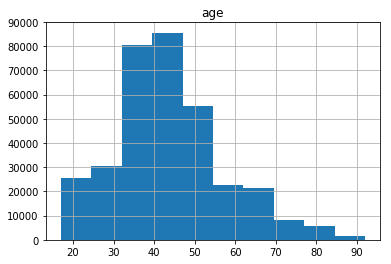

In [9]:
#Distribution des âges
print(data.age.describe())
data[['age']].hist(bins = 10)

In [10]:
#Ajout colonne tranche âge
#age min = 17, q1 = 34, age median=41, q3=50 ,age max = 92 

cut_labels = ['17-34', '34-41', '41-50', '50-92']
cut_bins = [17, 34, 41, 50, 92]
data['tranche_age'] = pd.cut(data['age'], bins=cut_bins, labels=cut_labels)
data.head(5)

,id_produit,date,id_session,id_client,genre,a_naissance,prix,categorie,annee_mois,age,tranche_age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0,2021-04,44,41-50
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0,2022-02,21,17-34
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0,2021-09,42,41-50
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0,2021-10,58,50-92
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0,2021-07,41,34-41


# Analyse et Visualisation de données

### Variables categorielles

In [11]:
data.head()

,id_produit,date,id_session,id_client,genre,a_naissance,prix,categorie,annee_mois,age,tranche_age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0,2021-04,44,41-50
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0,2022-02,21,17-34
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0,2021-09,42,41-50
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0,2021-10,58,50-92
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0,2021-07,41,34-41


Text(0, 0.5, 'Nombre de ventes')

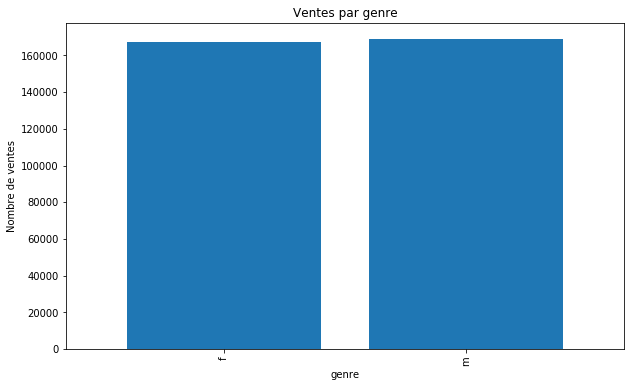

In [12]:
# GENRE : nombre de vente par genre
sex_bar_plot = data.groupby('genre').size()
plt.figure(figsize=(10,6))
sex_bar_plot.plot(kind='bar', title='Ventes par genre', width=0.8)
plt.ylabel('Nombre de ventes')

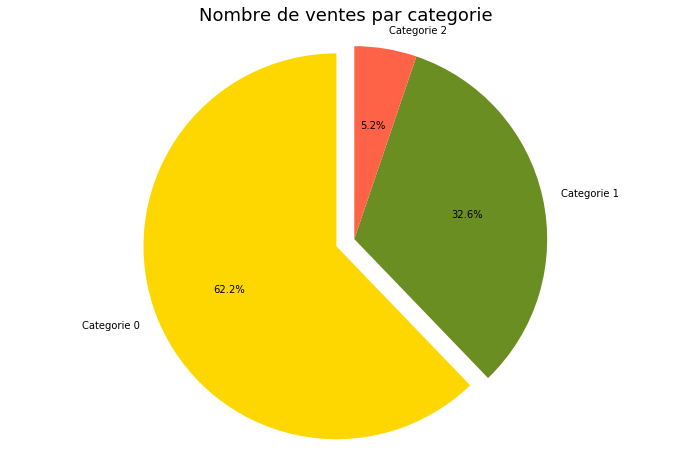

In [13]:
# CATEGORIE : nombre de vente par  categorie
plt.figure(figsize=(12,8))

sizes = data.groupby('categorie').size()
colors = ['gold', 'olivedrab', 'tomato']
explode = (0.1, 0, 0)
labels = ['Categorie 0', 'Categorie 1', 'Categorie 2']

plt.title("Nombre de ventes par categorie", size=18)
plt.pie(sizes,
        colors=colors,
        explode=explode,
        labels=labels,
        autopct='%1.1f%%', startangle=90)

#plt.legend(labels, loc="best")
plt.axis('equal')

plt.show()

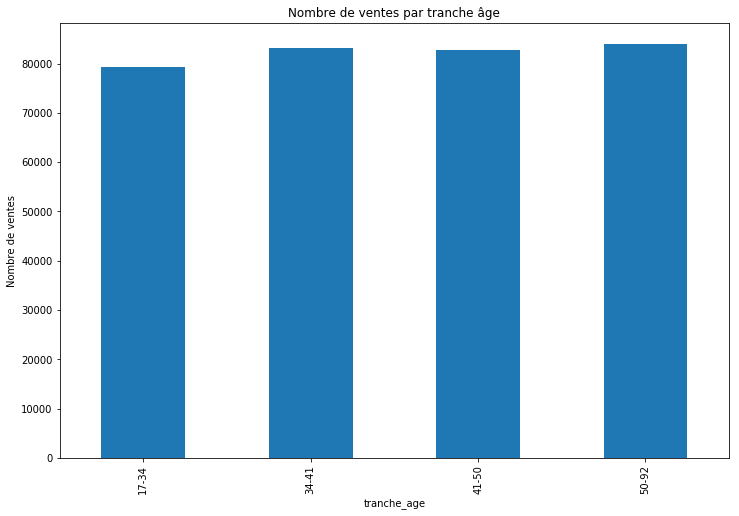

In [14]:
# Repartition des tranches d'age
plt.figure(figsize=(12,8))
age_viz = data.groupby(data.tranche_age).size()
plt.ylabel('Nombre de ventes')
plt.title('Nombre de ventes par tranche âge')
age_viz.plot.bar()

## 1- Analyse du CA

Text(0.5, 1.0, 'CA par an entre Mars 2021 et Février 2022')

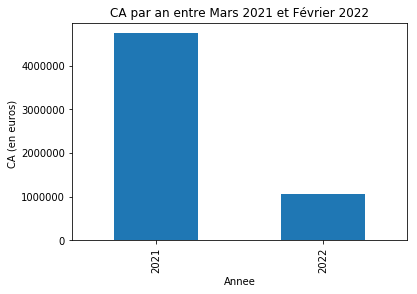

In [15]:
# CA annuel entre 2021-2022
ca_ans = data.groupby(data.date.dt.year)['prix'].sum()
ca_ans.plot.bar()
plt.xlabel("Annee")
plt.ylabel("CA (en euros) ")
plt.title("CA par an entre Mars 2021 et Février 2022")

In [16]:
# Analyse du Chiffre d'affaire

print("Chiffre d'affaire total: " + str(data.prix.sum().round()))
print("Chiffre d'affaire total en 2021: " + str(data[data.date.dt.year == 2021].prix.sum().round()))
print("Chiffre d'affaire total en 2022: " + str(data[data.date.dt.year == 2022].prix.sum().round()))

Chiffre d'affaire total: 5796578.0
Chiffre d'affaire total en 2021: 4740882.0
Chiffre d'affaire total en 2022: 1055696.0


In [17]:
# Chiffre d'affaire par mois 
ca_mois=data.groupby(["annee_mois"])["prix"].sum()
ca_mois

annee_mois
2021-03    479312.03
2021-04    472980.72
2021-05    489367.95
2021-06    481257.94
2021-07    480898.66
2021-08    479305.19
2021-09    502771.28
2021-10    319159.96
2021-11    512890.17
2021-12    522937.68
2022-01    522955.31
2022-02    532740.88
Freq: M, Name: prix, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

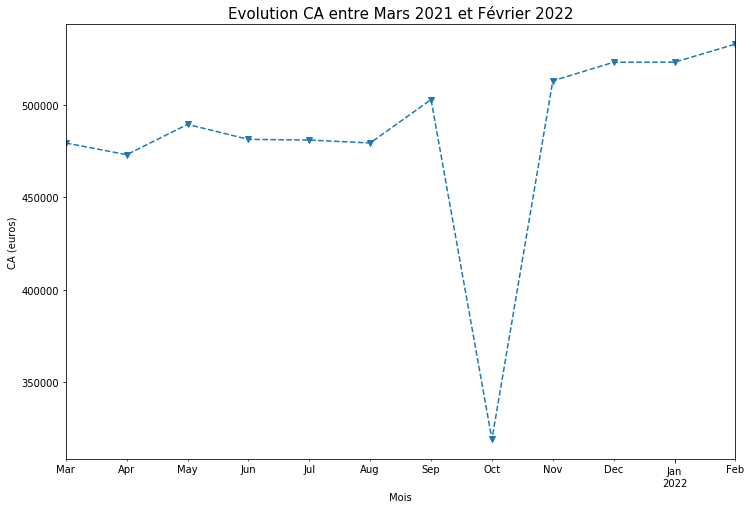

In [18]:
#Evolution du CA par mois

plt.figure(figsize=(12,8))
ca_mois.plot(x="annee_mois",y="prix", marker = 'v', linestyle = "--")
plt.ylabel("CA (euros)")
plt.xlabel("Mois")
plt.title("Evolution CA entre Mars 2021 et Février 2022", fontsize=15)
plt.show

Text(0.5, 1.0, 'Nombre de ventes de mars 2021 à février 2022 par categorie')

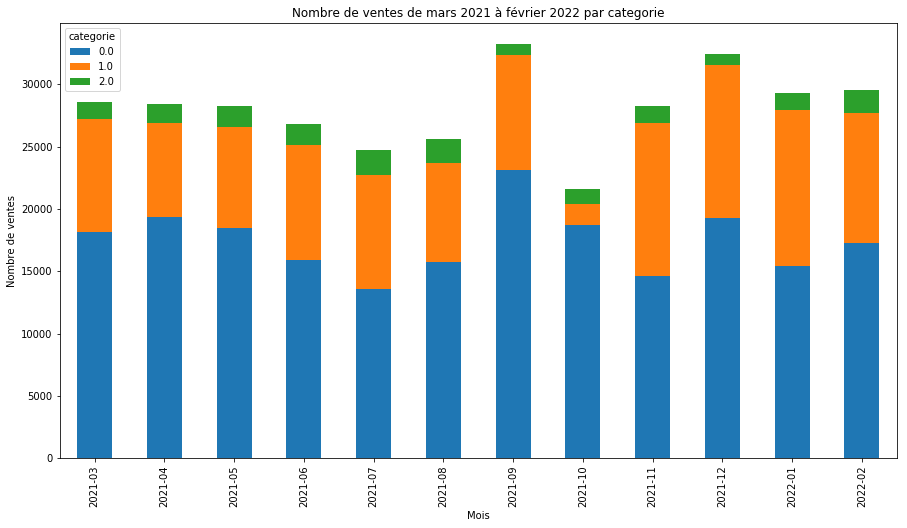

In [19]:
# Ventes par mois, par categorie
vente_mois_categ = data.groupby([data.date.dt.strftime('%Y-%m'), "categorie"]).size()
vente_mois_categ.unstack().plot(kind='bar', stacked=True,figsize=[15,8] )
plt.xlabel("Mois")
plt.ylabel("Nombre de ventes")
plt.title("Nombre de ventes de mars 2021 à février 2022 par categorie")

In [20]:
#En octobre : Baisse significative du CA en octobre, 
#les ventes de la catégorie 1 et 2 sont faibles. Legère baisse du nombre de vente de la catégorie 0
#Analyse des ventes en Octobre

### Analyse des ventes en octobre

In [21]:
data_oct = data[data.date.dt.strftime('%Y-%m')=='2021-10']
data_oct.head()

,id_produit,date,id_session,id_client,genre,a_naissance,prix,categorie,annee_mois,age,tranche_age
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0,2021-10,58,50-92
10,0_423,2021-10-09 23:50:33.907269,s_102501,c_2225,f,1949,1.99,0.0,2021-10,72,50-92
12,0_1368,2021-10-02 10:50:43.188179,s_98886,c_857,m,1985,5.13,0.0,2021-10,36,34-41
14,0_1207,2021-10-12 23:22:51.290635,s_103927,c_648,m,1976,16.99,0.0,2021-10,45,41-50
17,0_1452,2021-10-15 10:07:12.401758,s_105078,c_6297,f,1969,13.77,0.0,2021-10,52,50-92


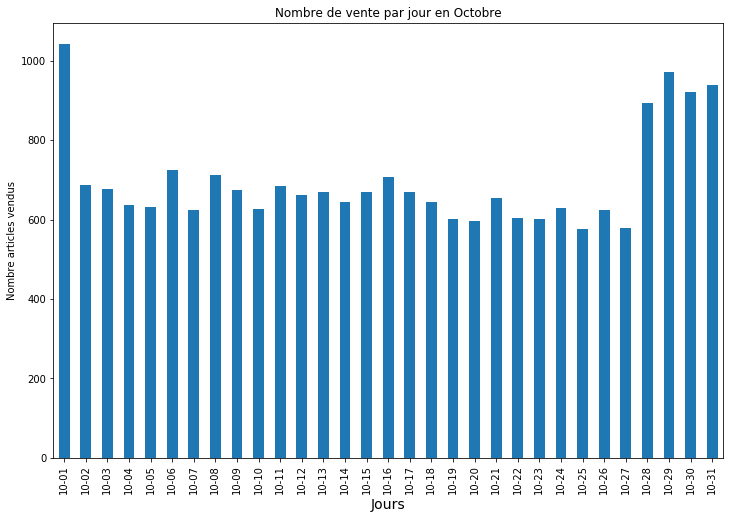

In [22]:
#Evolution des ventes en octobre
octobre = data_oct.groupby(data_oct.date.dt.strftime('%m-%d')).size()
plt.figure(figsize=(12,8))
octobre.plot.bar()

plt.ylabel("Nombre articles vendus")
plt.xlabel("Jours", size=14)
plt.title("Nombre de vente par jour en Octobre")
plt.show()


Text(0.5, 1.0, 'Nombre de ventes par jour en octobre par categorie')

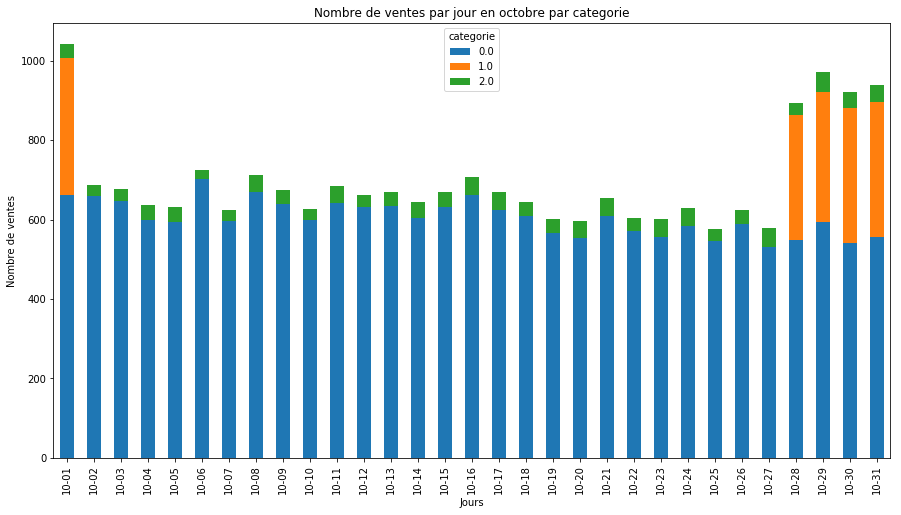

In [23]:
# Ventes en octobre par categorie
vente_oct_categ = data_oct.groupby([data_oct.date.dt.strftime('%m-%d'), "categorie"]).size()
vente_oct_categ.unstack().plot(kind='bar', stacked=True,figsize=[15,8] )
plt.xlabel("Jours")
plt.ylabel("Nombre de ventes")
plt.title("Nombre de ventes par jour en octobre par categorie")



In [24]:
#Il n’y a pas d’article de catégorie 1 qui sont vendus entre le 2 et 27 octobre. 
#Peut-être que qu'il y'a eu une rupture de stock au cours de cette période 
#Ou bien un problème technique est survenu

In [25]:
# Calculer pourcentage des ventes du mois d'octobre sur les ventes totales
octobre=data[data.date.dt.month == 10]
oct_per=100*len(octobre)/len(data)
print("Pourcentage ventes en octobre = ", round(oct_per,1), "% des ventes totales")

Pourcentage ventes en octobre =  6.4 % des ventes totales


## 2- Analyse des prix des produits

### Distribution du prix

count    336713.000000
mean         17.215189
std          17.855445
min           0.620000
25%           8.610000
50%          13.900000
75%          18.990000
max         300.000000
Name: prix, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f347c455828>]],
      dtype=object)

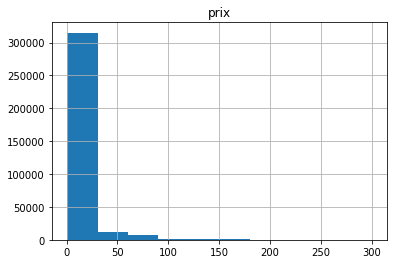

In [26]:
# Distribution du prix
print(data.prix.describe())
data[['prix']].hist()

In [27]:
# Il y a un forte variabilité du prix
# Les prix vont de 1 euros à 300 euros.
# En regardant la distribution de la variable prix on constate que la distribution des prix des transactions
# se concentre entre 1 euros et 50-60 euros

In [28]:
# Pour la visualisation de la distribution => exclure les prix au dessus d'un certain montant
# afin de mieux capturer la distribution de la variable prix
PRIXLIMIT = 60

                prix
count  326393.000000
mean       14.828188
std         9.208692
min         0.620000
25%         8.410000
50%        13.260000
75%        18.600000
max        59.990000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f347c5b7eb8>]],
      dtype=object)

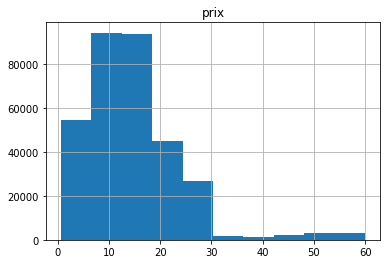

In [29]:
#Distribution des prix < 60 euros
print(data[['prix']][data.prix < PRIXLIMIT].describe())
data[['prix']][data.prix < PRIXLIMIT].hist()

### Analyse CA par produit

In [30]:
data.describe()

,a_naissance,prix,age
count,336713.000000,336713.000000,336713.000000
mean,1977.823568,17.215189,43.176432
std,13.524433,17.855445,13.524433
min,1929.000000,0.620000,17.000000
25%,1971.000000,8.610000,34.000000
50%,1980.000000,13.900000,41.000000
75%,1987.000000,18.990000,50.000000
max,2004.000000,300.000000,92.000000


In [31]:
# Chiffre d'affaire par produit
prix_produits = pd.DataFrame(data.groupby('id_produit')['prix'].agg(['sum','mean', 'size']).reset_index())
prix_produits.columns = ['id_produit', 'ca_produit', 'ca_moyen_par_produit', 'nb_tot_produit_vendus']

# prct CA par produit

prix_produits['prct_ca_produit_sur_CA_tot']  = (prix_produits['ca_produit'] / prix_produits.ca_produit.sum()) * 100
prix_produits.head()


,id_produit,ca_produit,ca_moyen_par_produit,nb_tot_produit_vendus,prct_ca_produit_sur_CA_tot
0,0_0,2291.25,3.75,611,0.039528
1,0_1,2736.51,10.99,249,0.047209
2,0_10,215.40,17.95,12,0.003716
3,0_100,41.20,20.60,2,0.000711
4,0_1000,1518.48,6.84,222,0.026196


In [32]:
prix_produits.sort_values(by='ca_produit',ascending=False).head(10)

,id_produit,ca_produit,ca_moyen_par_produit,nb_tot_produit_vendus,prct_ca_produit_sur_CA_tot
3069,2_135,33874.09,68.99,491,0.584381
3044,2_112,31960.61,67.57,473,0.551370
3033,2_102,28919.46,59.14,489,0.498906
3151,2_209,27296.10,69.99,390,0.470900
3042,2_110,27016.50,62.25,434,0.466077
2590,1_369,25933.19,23.99,1081,0.447388
2618,1_395,25830.09,28.99,891,0.445609
3103,2_166,25534.44,230.04,111,0.440509
3205,2_43,25266.39,69.99,361,0.435885
3200,2_39,25225.65,57.99,435,0.435182


In [33]:
prix_produits.ca_produit.median()

401.81500000000017

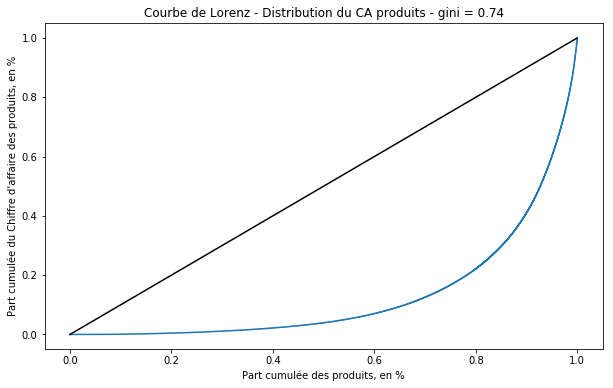

In [34]:
# Mesure de la concentration du CA des produits

montant = prix_produits['ca_produit']
lorenz = np.cumsum(np.sort(montant)) / montant.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

# Calculer gini
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2*S

fig, ax = plt.subplots(figsize=[10,6])
plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
ax.plot([0,1], [0,1], color='k')
plt.title("Courbe de Lorenz - Distribution du CA produits - gini = %s" %round(gini,2), size=12)
plt.xlabel("Part cumulée des produits, en %")
plt.ylabel("Part cumulée du Chiffre d'affaire des produits, en %")

plt.show()

In [35]:
#### Analyse:
#### 20% du chiffre d'affaire est générés par 80% des produits.
#### Autrement dit 80% du chiffre d'affaire est générée par seulement 20% des produits.
#### La repartition du chiffre d'affaire par produits est inégalitaire comme nous l'indique L'indice de Gini.
#### Le chiffre d'affaire se concentre sur peu de produits.

## 3-Analyse du comportement des clients

In [36]:
data.sort_values('id_client').head()

,id_produit,date,id_session,id_client,genre,a_naissance,prix,categorie,annee_mois,age,tranche_age
30044,1_364,2021-12-15 23:32:41.632729,s_134971,c_1,m,1955,10.30,1.0,2021-12,66,50-92
145089,0_1186,2021-07-25 12:17:34.446678,s_66947,c_1,m,1955,12.30,0.0,2021-07,66,50-92
83272,0_1429,2021-10-15 11:28:24.523566,s_105105,c_1,m,1955,7.99,0.0,2021-10,66,50-92
126737,0_1571,2022-02-01 01:47:04.355850,s_158128,c_1,m,1955,5.99,0.0,2022-02,66,50-92
28386,1_713,2021-11-15 20:40:00.586010,s_120172,c_1,m,1955,33.99,1.0,2021-11,66,50-92


### Achats des clients

In [37]:
#Analyse des achats par clients 
achat_client = pd.DataFrame(data.groupby('id_client')['prix'].agg(['sum','mean', 'size']).reset_index())
achat_client.columns = ['id_client', 'ca_client', 'ca_moyen_par_article', 'nb_tot_article_achete']

# prct CA par client

achat_client['prct_ca_client_sur_CA_tot']  = (achat_client['ca_client'] / achat_client.ca_client.sum()) * 100 
achat_client.head()

,id_client,ca_client,ca_moyen_par_article,nb_tot_article_achete,prct_ca_client_sur_CA_tot
0,c_1,300.65,15.032500,20,0.005187
1,c_10,586.18,20.935000,28,0.010113
2,c_100,222.87,37.145000,6,0.003845
3,c_1000,980.02,17.500357,56,0.016907
4,c_1001,1102.45,19.007759,58,0.019019


In [38]:
achat_client.sort_values(by='ca_client',ascending=False).head(10)

,id_client,ca_client,ca_moyen_par_article,nb_tot_article_achete,prct_ca_client_sur_CA_tot
677,c_1609,162007.34,12.602671,12855,2.794879
4388,c_4958,144257.21,56.306483,2562,2.488662
6337,c_6714,73197.34,16.371581,4471,1.262768
2724,c_3454,54442.92,16.633951,3273,0.939225
7715,c_7959,2564.25,13.150000,195,0.044237
3870,c_4491,2540.53,15.122202,168,0.043828
7791,c_8026,2537.67,13.217031,192,0.043779
1268,c_2140,2527.01,12.959026,195,0.043595
8195,c_8392,2515.98,13.312063,189,0.043405
7120,c_7421,2511.98,13.290899,189,0.043336


In [39]:
#CA median
achat_client.ca_client.median()

501.31000000000006

           ca_client
count    8600.000000
mean      674.020671
std      2565.848732
min         4.150000
25%       275.765000
50%       501.310000
75%       870.650000
max    162007.340000


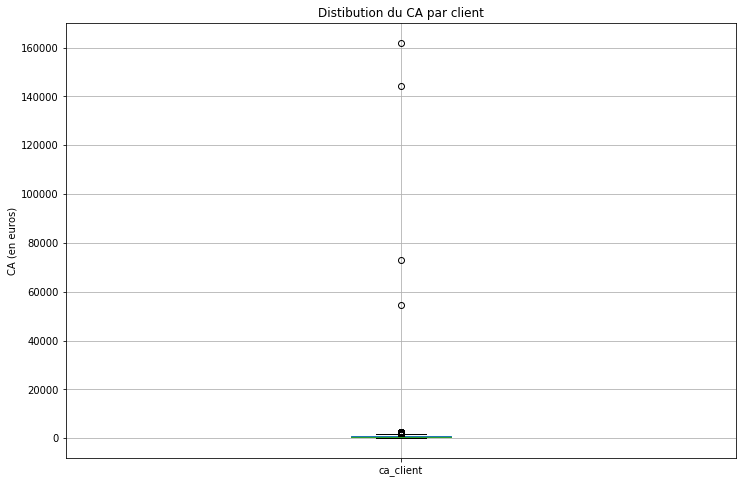

In [40]:
#Distribution du chiffre d'affaire par client
print(achat_client[['ca_client']].describe())
plt.figure(figsize=(12,8))
boxplot_ca_client = achat_client.boxplot(column=['ca_client'])
plt.title("Distibution du CA par client")
plt.ylabel("CA (en euros)")
plt.suptitle("")
plt.show()

In [41]:
# Il ya 4 clients outlier : soit des clients distincts qui achètent pour un panier > 54.000 euros en 12 mois. 
# Ce sont probablement des clients grossistes: c_1609, c_4958, c_6714, c_3454
#On peut diviser les clients en 2 : grossistes , ventes au details

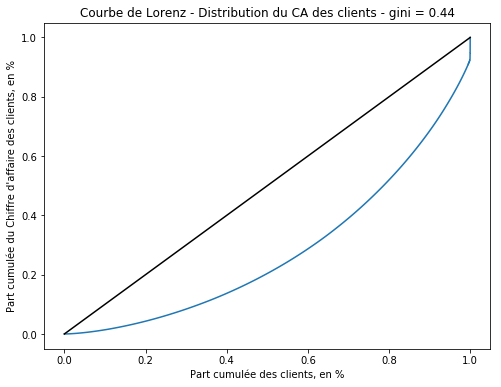

In [42]:
# Mesure de la concentration du CA

montant = achat_client['ca_client']
lorenz = np.cumsum(np.sort(montant)) / montant.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

# Calculer gini
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2*S

fig, ax = plt.subplots(figsize=[8,6])
plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
ax.plot([0,1], [0,1], color='k')
plt.title("Courbe de Lorenz - Distribution du CA des clients - gini = %s" %round(gini,2), size=12)
plt.xlabel("Part cumulée des clients, en %")
plt.ylabel("Part cumulée du Chiffre d'affaire des clients, en %")

plt.show()

In [43]:
#### Analyse:
#### Environ 30% du chiffre d'affaire est générés par 60% des clients.
#### Autrement dit 70% du chiffre d'affaire est générée par 40% des produits.
#### La repartition du chiffre d'affaire par clients est inégalitaire comme nous l'indique L'indice de Gini.
#### Elle est plus égalitaire que la distribution de CA par produits
#### Le chiffre d'affaire se concentre sur plusieurs clients. LE chiffre d'affaire depend moins de certains clients.
#### Mis à part les clients outliers qui representent 7% du chiffre d'affaire

### Analyse des clients grossistes 

In [44]:
achat_client_grossite = achat_client[achat_client['id_client'].isin(['c_1609','c_4958','c_6714','c_3454'])]

          ca_client
count       4.00000
mean   108476.20250
std     52630.96977
min     54442.92000
25%     68508.73500
50%    108727.27500
75%    148694.74250
max    162007.34000


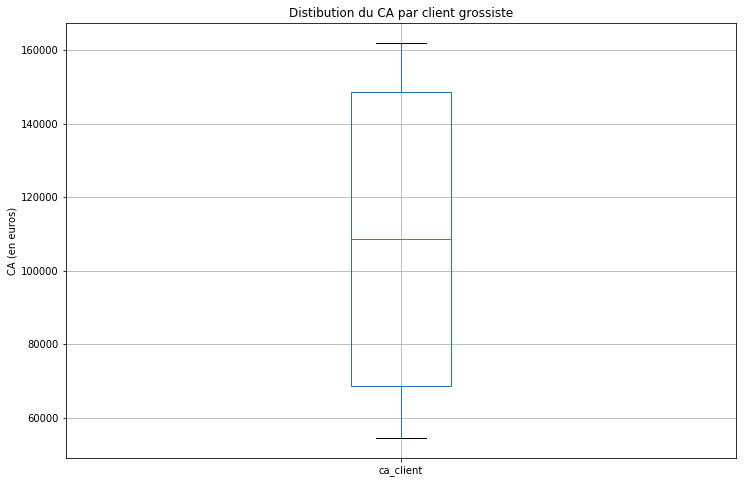

In [45]:
#Distribution du chiffre d'affaire par client grossiste
print(achat_client_grossite[['ca_client']].describe())
plt.figure(figsize=(12,8))
boxplot_ca_client = achat_client_grossite.boxplot(column=['ca_client'])
plt.title("Distibution du CA par client grossiste")
plt.ylabel("CA (en euros)")
plt.suptitle("")
plt.show()

In [46]:
print('Le CA total des clients grossite est de ' + str(round(achat_client_grossite.ca_client.sum())) + ' euros')
print('Part du CA des grossite ' + str(round(achat_client_grossite.prct_ca_client_sur_CA_tot.sum())) + ' %')
print("Le prix d'achat moyen par article par client grossiste est de " + str(round(achat_client_grossite.ca_moyen_par_article.mean())) + ' euros')
print("Le nombre total d'article achetés par client grossite en moyenne est de " + str(round(achat_client_grossite.nb_tot_article_achete.mean())) + ' articles')

Le CA total des clients grossite est de 433905.0 euros
Part du CA des grossite 7.0 %
Le prix d'achat moyen par article par client grossiste est de 25 euros
Le nombre total d'article achetés par client grossite en moyenne est de 5790 articles


### Analyse des clients details

In [47]:
achat_client_detail = achat_client[~achat_client['id_client'].isin(['c_1609','c_4958','c_6714','c_3454'])]

         ca_client
count  8596.000000
mean    623.856789
std     457.027384
min       4.150000
25%     275.632500
50%     501.170000
75%     869.785000
max    2564.250000


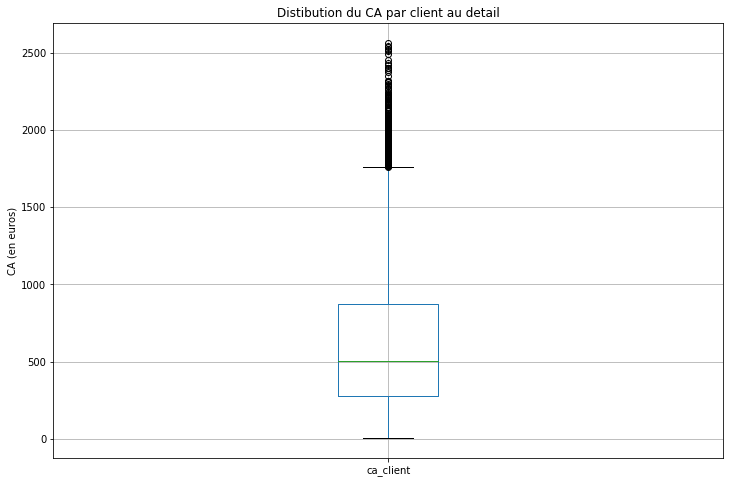

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f347c2b1fd0>]],
      dtype=object)

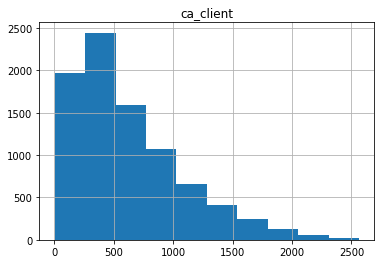

In [48]:
#Distribution du chiffre d'affaire par client au details
print(achat_client_detail[['ca_client']].describe())
plt.figure(figsize=(12,8))
boxplot_ca_client = achat_client_detail.boxplot(column=['ca_client'])
plt.title("Distibution du CA par client au detail")
plt.ylabel("CA (en euros)")
plt.xlabel("")
plt.suptitle("")
plt.show()
achat_client_detail[['ca_client']].hist()

In [49]:
print('Le CA total des clients au detail est de ' + str(round(achat_client_detail.ca_client.sum())) + ' euros')
print('Pourcentage du CA des clients au detail est de ' + str(round(achat_client_detail.prct_ca_client_sur_CA_tot.sum())) + ' euros')
print("Le prix d'achat moyen par article par client est de " + str(round(achat_client_detail.ca_moyen_par_article.mean())) + ' euros')
print("Le nombre total d'article acheté par clients en moyenne est de " + str(round(achat_client_detail.nb_tot_article_achete.mean())) + ' articles')

Le CA total des clients au detail est de 5362673.0 euros
Pourcentage du CA des clients au detail est de 93.0 euros
Le prix d'achat moyen par article par client est de 22 euros
Le nombre total d'article acheté par clients en moyenne est de 36 articles


# 4-Analyse des sessions

In [50]:
data.sort_values(by='id_session').head()

,id_produit,date,id_session,id_client,genre,a_naissance,prix,categorie,annee_mois,age,tranche_age
176428,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,11.99,0.0,2021-03,54,50-92
309268,1_635,2021-03-01 00:10:33.163037,s_10,c_2218,f,1970,26.99,1.0,2021-03,51,50-92
42000,0_1451,2021-03-01 04:43:58.025677,s_100,c_3854,f,1978,19.99,0.0,2021-03,43,41-50
148776,0_1030,2021-03-01 04:12:43.572994,s_100,c_3854,f,1978,13.73,0.0,2021-03,43,41-50
249839,0_1625,2021-03-03 02:38:09.568389,s_1000,c_1014,m,1989,5.99,0.0,2021-03,32,17-34


In [51]:
#Analyse des sessions des clients
achat_session = pd.DataFrame(data.groupby(['id_session', 'age', 'tranche_age'])['prix'].agg(['sum','mean', 'size']).reset_index())
achat_session.columns = ['id_session', 'age', 'tranche_age', 'ca_session', 'ca_moyen_par_article', 'nb_tot_article_achete']

# prct CA par client
achat_session['prct_ca_session_sur_CA_tot']  = (achat_session['ca_session'] / achat_session.ca_session.sum()) * 100 
achat_session.head()


,id_session,age,tranche_age,ca_session,ca_moyen_par_article,nb_tot_article_achete,prct_ca_session_sur_CA_tot
0,s_1,54,50-92,11.99,11.990,1,0.000218
1,s_10,51,50-92,26.99,26.990,1,0.000491
2,s_100,43,41-50,33.72,16.860,2,0.000613
3,s_1000,32,17-34,39.22,9.805,4,0.000713
4,s_10000,32,17-34,41.49,13.830,3,0.000754


In [52]:
achat_session.sort_values(by='ca_session',ascending=False).head(10)

,id_session,age,tranche_age,ca_session,ca_moyen_par_article,nb_tot_article_achete,prct_ca_session_sur_CA_tot
22382,s_123227,28,17-34,539.23,179.743333,3,0.009802
51955,s_150439,28,17-34,496.22,124.055000,4,0.009020
73606,s_170478,23,17-34,476.19,95.238000,5,0.008656
68440,s_165683,22,17-34,473.98,236.990000,2,0.008616
121170,s_59203,22,17-34,458.42,91.684000,5,0.008333
132192,s_69450,24,17-34,452.45,113.112500,4,0.008225
105879,s_45051,23,17-34,450.09,90.018000,5,0.008182
69645,s_166799,22,17-34,447.35,149.116667,3,0.008132
144899,s_81243,24,17-34,444.20,148.066667,3,0.008075
119067,s_57258,22,17-34,432.27,144.090000,3,0.007858


In [53]:
#CA median
achat_session.ca_session.median()

24.99

          ca_session
count  164991.000000
mean       33.342363
std        30.470163
min         0.620000
25%        14.990000
50%        24.990000
75%        41.980000
max       539.230000


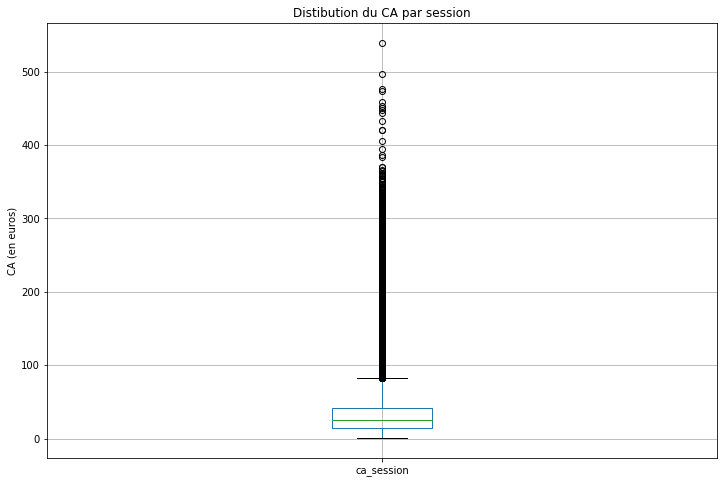

In [54]:
#Distribution du chiffre d'affaire par client
print(achat_session[['ca_session']].describe())
plt.figure(figsize=(12,8))
boxplot_ca_session = achat_session.boxplot(column=['ca_session'])
plt.title("Distibution du CA par session")
plt.ylabel("CA (en euros)")
plt.suptitle("")
plt.show()

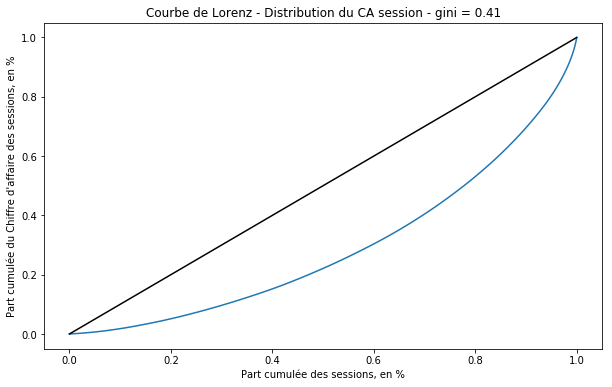

In [55]:
# Mesure de la concentration du CA des sessions

montant = achat_session['ca_session']
lorenz = np.cumsum(np.sort(montant)) / montant.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

# Calculer gini
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2*S

fig, ax = plt.subplots(figsize=[10,6])
plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
ax.plot([0,1], [0,1], color='k')
plt.title("Courbe de Lorenz - Distribution du CA session - gini = %s" %round(gini,2), size=12)
plt.xlabel("Part cumulée des sessions, en %")
plt.ylabel("Part cumulée du Chiffre d'affaire des sessions, en %")
plt.show()

# Creation dataset Analyse sans le mois d'octobre et sans les clients grossistes

In [56]:
data.head()

,id_produit,date,id_session,id_client,genre,a_naissance,prix,categorie,annee_mois,age,tranche_age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0,2021-04,44,41-50
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0,2022-02,21,17-34
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0,2021-09,42,41-50
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0,2021-10,58,50-92
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0,2021-07,41,34-41


In [57]:
# Nouvelle df sans le mois d'octobre et clients grossistes
dataset_transac_analyse = data[~data['id_client'].isin(['c_1609','c_4958','c_6714','c_3454'])]
dataset_transac_analyse = dataset_transac_analyse[dataset_transac_analyse.date.dt.strftime('%Y-%m')!= '2021-10']

print(dataset_transac_analyse.shape)
dataset_transac_analyse.head()

(293516, 11)


,id_produit,date,id_session,id_client,genre,a_naissance,prix,categorie,annee_mois,age,tranche_age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0,2021-04,44,41-50
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0,2022-02,21,17-34
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0,2021-09,42,41-50
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0,2021-07,41,34-41
5,0_1085,2021-09-15 05:47:48.215162,s_90139,c_2526,f,1982,3.99,0.0,2021-09,39,34-41


# Analyse Bivariée

### Correlation

### Pearson

(-0.1971410345808787, 0.0)


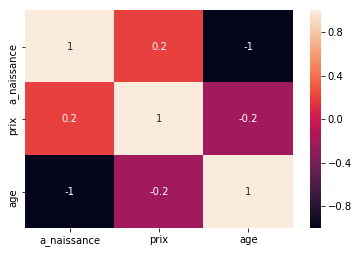

In [58]:
# Matrice de correlation de Pearson
corrMatrix = dataset_transac_analyse.corr(method = 'pearson')
sns.heatmap(corrMatrix, annot=True)

# TEst student -https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html
print(st.pearsonr(dataset_transac_analyse['prix'], dataset_transac_analyse['age']))
plt.show()

In [59]:
### Le coefficient de corrélation de pearson mesure une corrélation linéaire entre deux variables.

### La corrélation est une mesure statistique qui nous renseigne sur l'association entre deux variables.
### Elle décrit le comportement d'une variable en cas de changement de l'autre variable.

### Correlation negative entre le prix et l'age.
### Si la p-value est inférieure à 5%, la corrélation est dite significative.
### La p-value est de 0.0. On peut donc conclure que la correlation negative entre l'prix et l'age est significative

In [60]:
### Dans le cas ou la méthode utilisée est de type “kendall” ou “spearman”.
### les statistiques tau de kendall et rho de Spearman sont respectivement utilisées pour estimer le coefficient de corrélation basé sur le rang.
### Ce sont des tests statistiques dits robustes car ils ne dépendent pas de la distribution des données. Le test de corrélation de Kendall et celui de Spearman est recommandé lorsque les variables ne suivent pas une loi normale.

### Spearman

SpearmanrResult(correlation=-0.046203389283475255, pvalue=1.9825393232459958e-138)


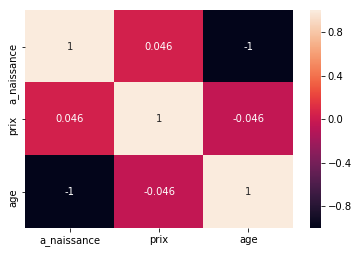

In [61]:
# Matrice de correlation de Pearson
corrMatrix = dataset_transac_analyse.corr(method = 'spearman')
sns.heatmap(corrMatrix, annot=True)

# Test student -https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html
print(st.spearmanr(dataset_transac_analyse['prix'], dataset_transac_analyse['age']))
plt.show()

In [62]:
### Le coefficient de corrélation de Spearman mesure les relations non-linéaires monotones.
### L'age est une variable montone croissante.
### Une fonction monotone est une fonction entre ensembles ordonnés qui préserve ou renverse l'ordre. 

###Le coefficient de corrélation de Spearman est basé sur les valeurs classées de chaque variable plutôt que sur les données brutes.

### Faible correlation negative entre le prix et l'age.
### Si la p-value est inférieure à 5%, la corrélation est dite significative.
### La p-value est de 0.0. On peut donc conclure que la correlation negative entre l'prix et l'age est significative

#### Correlation prix et categorie 

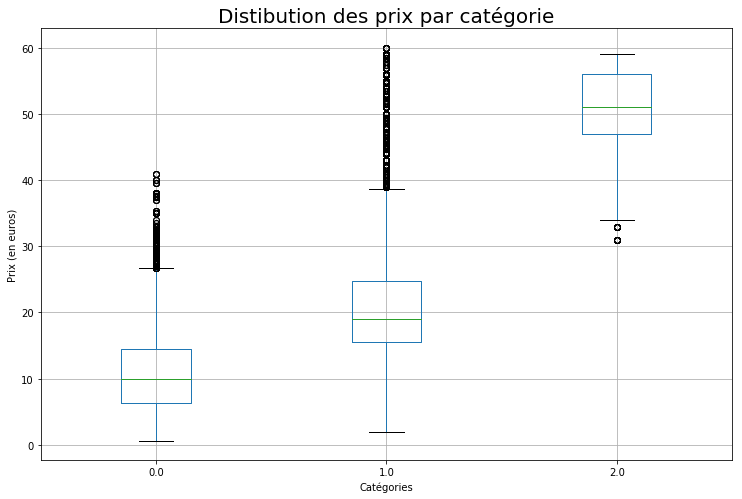

In [63]:
#Distribution des prix par catégorie #Variable quanti et quali

boxplot_price_categ = dataset_transac_analyse[dataset_transac_analyse.prix < PRIXLIMIT].boxplot(column=['prix'], by='categorie', figsize=(12,8))

plt.title("Distibution des prix par catégorie", size=20)
plt.xlabel("Catégories")
plt.ylabel("Prix (en euros)")
plt.suptitle("")
plt.show()

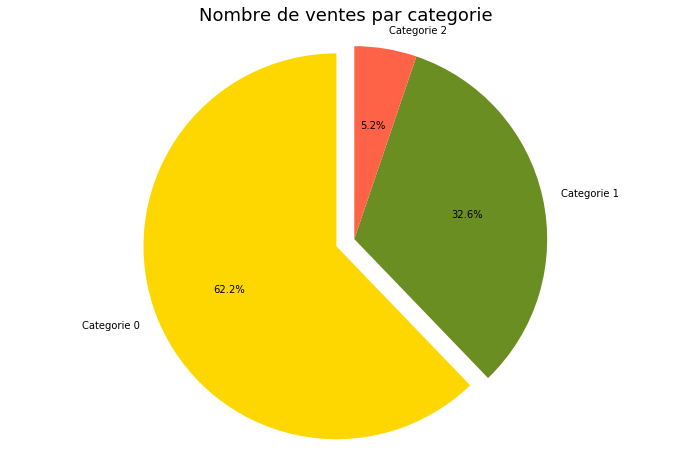

In [64]:
# Rappel du nombre de vente par categorie

# CATEGORIE : nombre de vente par  categorie
plt.figure(figsize=(12,8))

sizes = data.groupby('categorie').size()
colors = ['gold', 'olivedrab', 'tomato']
explode = (0.1, 0, 0)
labels = ['Categorie 0', 'Categorie 1', 'Categorie 2']

plt.title("Nombre de ventes par categorie", size=18)
plt.pie(sizes,
        colors=colors,
        explode=explode,
        labels=labels,
        autopct='%1.1f%%', startangle=90)

#plt.legend(labels, loc="best")
plt.axis('equal')

plt.show()


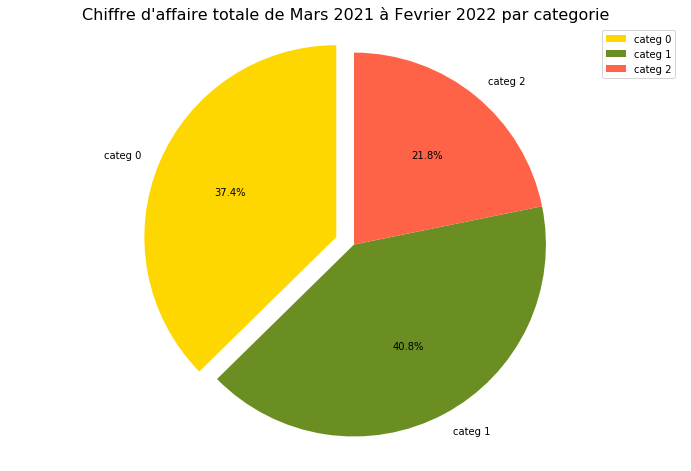

In [65]:

# Graphique : "Chiffre d'affaire totale de Mars 2021 à Fevrier 2022 par categorie"

# Calculer CA par categorie
ca_categ=dataset_transac_analyse.pivot_table(index="categorie", values="prix",aggfunc=sum)
ca_categ.reset_index()

# Créer 2 arrays
value = ca_categ['prix']
cat=[0.0,1.0,2.0]

# Créer un df categ_ca
categ_ca = pd.DataFrame({"categ":cat, "montant":value})
categ_ca

plt.figure(figsize=(12, 8))
labels=['categ 0', 'categ 1', 'categ 2']
sizes=categ_ca["montant"]
colors = ['gold', 'olivedrab', 'tomato']
explode = (0.1, 0, 0)
plt.title("Chiffre d'affaire totale de Mars 2021 à Fevrier 2022 par categorie", size=16)
plt.pie(sizes, colors=colors, explode=explode, labels=labels,autopct='%1.1f%%', startangle=90)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()



In [66]:
# Conclusion
#la catégorie 2 represente 5% des achats => son CA represente 21,8% du chiffre d’affaires total des 3 catégories.
# Cela peut s'expliquer par le fait que le prix medians des biens de categorie 2 est de presque 60 euros
# Categorie 1 prix median = 20 - Categorie 0 eviron 10 euros

### Test Anova - Prix Categorie

In [67]:
#Test ANOVA
#prix = quantitative
#categorie = qualitative
import statsmodels.formula.api; fit = statsmodels.formula.api.ols('prix ~ categorie', data = dataset_transac_analyse).fit()
import statsmodels.api; table = statsmodels.api.stats.anova_lm(fit)
table

,df,sum_sq,mean_sq,F,PR(>F)
categorie,2.0,5.811815e+07,2.905907e+07,260449.133773,0.0
Residual,293513.0,3.274811e+07,1.115729e+02,NaN,NaN


In [68]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('prix~ categorie', data=dataset_transac_analyse).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
categorie,5.811815e+07,2.0,260449.133773,0.0
Residual,3.274811e+07,293513.0,NaN,NaN


In [69]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
categorie,5.811815e+07,2.0,2.905907e+07,260449.133773,0.0,0.639601,0.639598
Residual,3.274811e+07,293513.0,1.115729e+02,NaN,NaN,NaN,NaN


In [70]:
## https://www.r-bloggers.com/2017/07/effect-size-statistics-for-anova-tables-rstats/

####Eta_sq
#### L'eta au carré est la proportion de la variabilité totale de la variable dépendante qui est expliquée par la variation de la variable indépendante.
####Il s'agit du rapport entre la somme des carrés pour chaque niveau de groupe et la somme totale des carrés.
#### Il peut être interprété comme le pourcentage de variance pris en compte par une variable.

#### Pour les variables avec un degré de liberté (au numérateur), la racine carrée de eta au carré est égale au coefficient de corrélation r.
#### Pour les variables avec plus d'un degré de liberté, eta au carré est égal à R2.
#### Cela rend l'eta au carré facilement interprétable. En outre, ces tailles d'effet peuvent facilement être converties en mesures de taille d'effet qui peuvent, par exemple, être traitées ultérieurement dans des méta-analyses.

#### Nous avons ici un df = 2 donc notre eta_sq est notre R2
#### p < 0,05
#### eta-2 = 0,64 : les moyennes par classes sont différents
#### Supposition : Il y a une relation entre catégorie et le prix

## Analyse des ventes par tranche d'age

Text(0.5, 1.0, "Chiffre d'affaire par tranche d'âge")

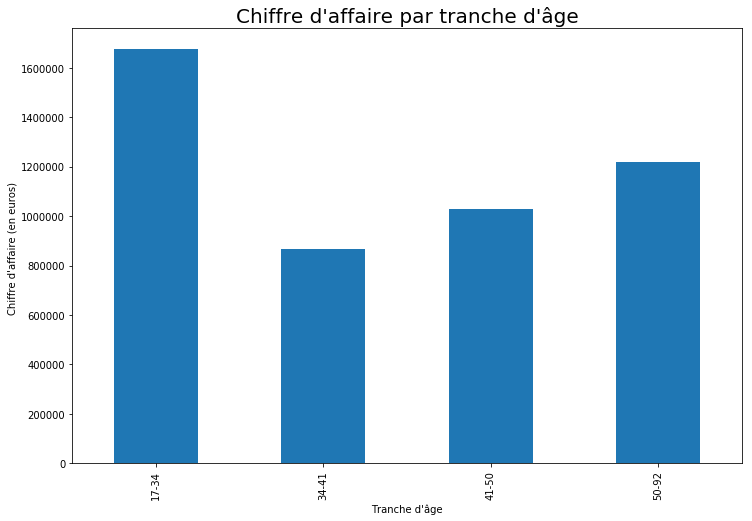

In [71]:
# Repartition entre la tranche d'âge et le montant total des achats
dataset_transac_analyse.groupby(['tranche_age'])['prix'].agg('sum').plot(kind='bar', stacked=False, figsize=(12,8))
plt.xlabel("Tranche d'âge")
plt.ylabel("Chiffre d'affaire (en euros) ")
plt.title("Chiffre d'affaire par tranche d'âge", size=20)

### Statistical test

In [72]:
#Test ANOVA
fit = statsmodels.formula.api.ols('prix ~ tranche_age', data = dataset_transac_analyse).fit()
table = statsmodels.api.stats.anova_lm(fit)
table

,df,sum_sq,mean_sq,F,PR(>F)
tranche_age,3.0,4.807134e+06,1.602378e+06,6358.418052,0.0
Residual,286542.0,7.221113e+07,2.520089e+02,NaN,NaN


In [73]:
model = ols('prix~ tranche_age', data=dataset_transac_analyse).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
tranche_age,4.807134e+06,3.0,6358.418052,0.0
Residual,7.221113e+07,286542.0,NaN,NaN


In [74]:
anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
tranche_age,4.807134e+06,3.0,1.602378e+06,6358.418052,0.0,0.062416,0.062405
Residual,7.221113e+07,286542.0,2.520089e+02,NaN,NaN,NaN,NaN


In [75]:
##### Il n'y a pas relation entre tranche d'age et le prix

### Repartition entre l'âge et la catégorie de produits achetés

Text(0.5, 1.0, "Ventes par catégorie et tranche d'âge")

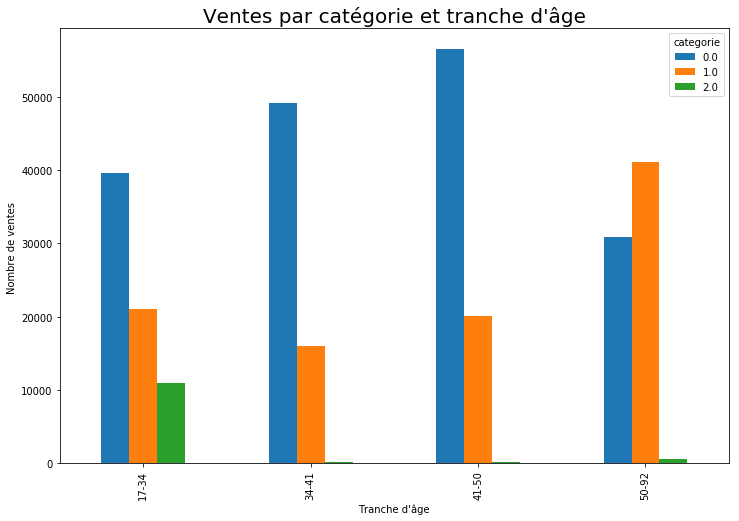

In [76]:
#Repartition entre l'âge et la catégorie de produits achetés
dataset_transac_analyse.groupby(["tranche_age", "categorie"]).size().unstack().plot(kind='bar', stacked=False,figsize=[12,8] )
plt.xlabel("Tranche d'âge")
plt.ylabel("Nombre de ventes ")
plt.title("Ventes par catégorie et tranche d'âge", size=20)

## Analyse vente par genre et categorie

Text(0.5, 1.0, 'Ventes par sexe')

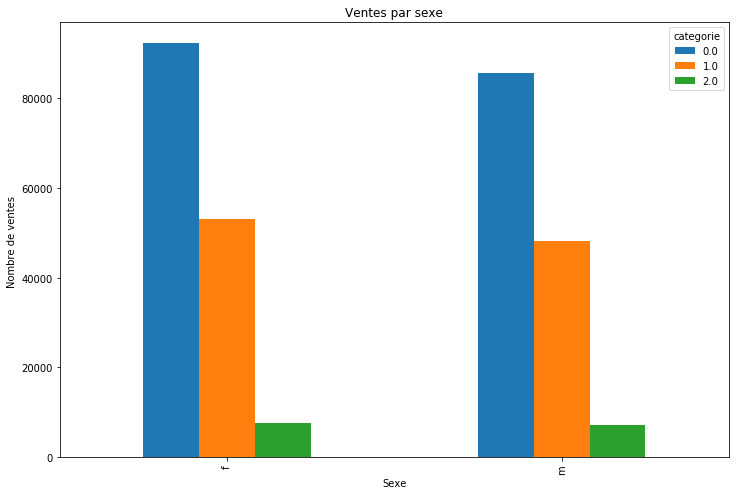

In [77]:
#Repartition entre le sexe et categories  => #quanti et quanti 
dataset_transac_analyse.groupby(["genre", "categorie"]).size().unstack().plot(kind='bar', stacked=False, figsize=(12,8))
plt.xlabel("Sexe")
plt.ylabel("Nombre de ventes ")
plt.title("Ventes par sexe")

In [78]:
#Heatmap
# Faire un tableau contingence
X = "genre"
Y = "categorie"

c = dataset_transac_analyse[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
cont_sex_categ = c.copy()

tx = data[X].value_counts()
ty = data[Y].value_counts()

cont_sex_categ.loc[:,"Total"] = tx
cont_sex_categ.loc["total",:] = ty
cont_sex_categ.loc["total","Total"] = len(data)
cont_sex_categ

categorie,0.0,1.0,2.0,Total
genre,,,,
f,92278.0,52993.0,7575.0,167515.0
m,85486.0,48061.0,7123.0,169198.0
total,209426.0,109735.0,17552.0,336713.0


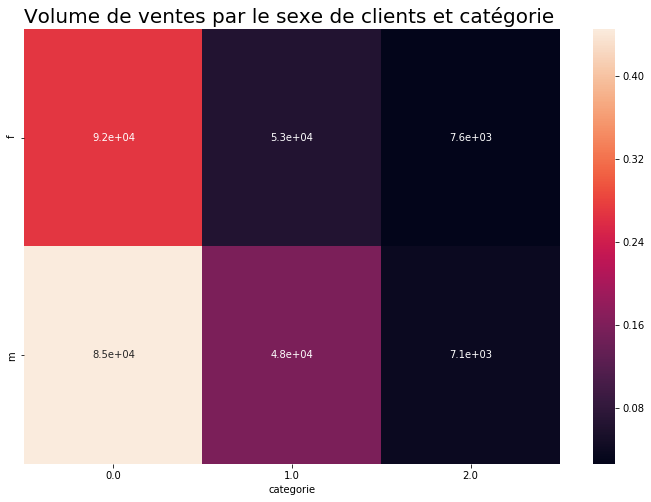

In [79]:
# tableau de contingence coloré :
plt.figure(figsize=(12,8))
tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)
tx.columns = ["foo"]
ty.columns = ["foo"]
n = len(dataset_transac_analyse)
indep = tx.dot(ty.T) / n

c = c.fillna(0) # on remplace les valeurs nulles par des 0
mesure = (c-indep)**2/indep
xi_n = mesure.sum().sum()
sns.heatmap(mesure/xi_n,annot=c)
plt.title("Volume de ventes par le sexe de clients et catégorie ", size=20)
plt.show()

In [80]:
xi_n

23110.829330504

In [81]:
contigency_pct = pd.crosstab(dataset_transac_analyse['genre'], dataset_transac_analyse['categorie'], normalize='index')
contigency_pct

categorie,0.0,1.0,2.0
genre,,,
f,0.603732,0.346708,0.049560
m,0.607706,0.341658,0.050636


## Test Chi-2 - Genre Categorie

In [82]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_pct)
p

0.9999691695756168

In [83]:
import researchpy as rp
rp.summary_cat(dataset_transac_analyse[["genre", "categorie"]])

,Variable,Outcome,Count,Percent
0,genre,f,152846,52.07
1,,m,140670,47.93
2,categorie,0.0,177764,60.56
3,,1.0,101054,34.43
4,,2.0,14698,5.01


In [84]:
crosstab = pd.crosstab(dataset_transac_analyse["genre"], dataset_transac_analyse["categorie"])
crosstab

categorie,0.0,1.0,2.0
genre,,,
f,92278,52993,7575
m,85486,48061,7123


In [85]:
st.chi2_contingency(crosstab)

(9.033153298066877,
 0.010926364497168512,
 2,
 array([[92569.11495114, 52623.02458469,  7653.86046417],
        [85194.88504886, 48430.97541531,  7044.13953583]]))

In [86]:
crosstab, test_results, expected = rp.crosstab(dataset_transac_analyse["genre"], dataset_transac_analyse["categorie"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

categorie                     
            0.0    1.0   2.0     All
genre                               
f         31.44  18.05  2.58   52.07
m         29.12  16.37  2.43   47.93
All       60.56  34.43  5.01  100.00

In [87]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,9.0332
1,p-value =,0.0109
2,Cramer's V =,0.0055


In [88]:
##### Avec le seuil de confiance 95% (alpha=0,05) ,
##### p-value < 0,05 & cramer's V < 0,05,
##### il y a une corrélation faible entre sexe de clients et chaque catégories

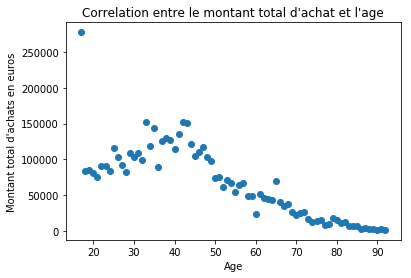

In [89]:
# Correlations entre l'âge des clients et le montant total 
corr_age_prix = dataset_transac_analyse.groupby(['age'])['prix'].agg('sum').reset_index()
x = corr_age_prix['age']
y = corr_age_prix['prix']
plt.scatter(x, y) 
plt.xlabel("Age")
plt.ylabel("Montant total d'achats en euros")
plt.title("Correlation entre le montant total d'achat et l'age")
plt.show()

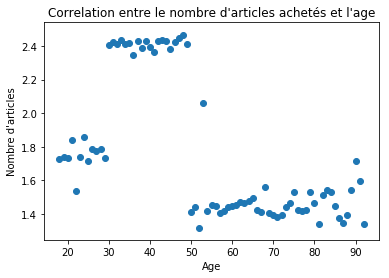

In [90]:
#Correlation entre l'age et le nombre d'article achetés (Taille panier Moyen)

corr_age_nb_article = achat_session.groupby(['age'])['nb_tot_article_achete'].agg('mean').reset_index()
x = corr_age_nb_article['age']
y = corr_age_nb_article['nb_tot_article_achete']
plt.scatter(x, y) 
plt.xlabel("Age")
plt.ylabel("Nombre d'articles")
plt.title("Correlation entre le nombre d'articles achetés et l'age")
plt.show()

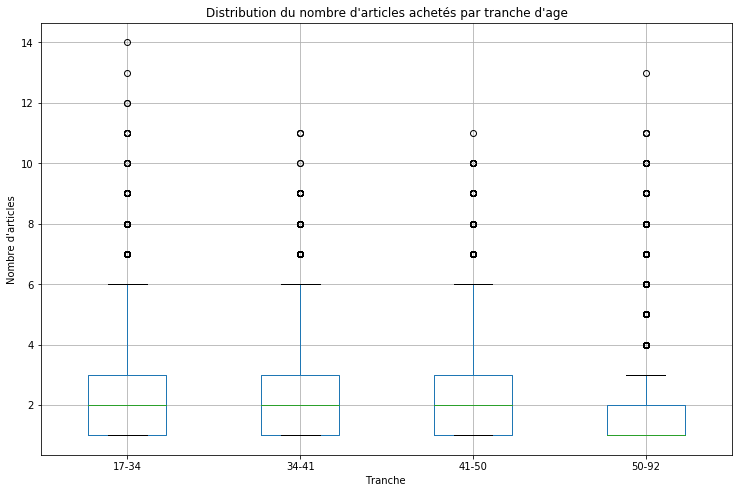

In [91]:
# Taille du panier moyen par tranche d'age
boxplot_nb_article_panier_trancheage = achat_session.boxplot(column=['nb_tot_article_achete'], by='tranche_age', figsize=(12,8))
boxplot_nb_article_panier_trancheage.set_ylabel('Nombre articles')

plt.title("Distribution du nombre d'articles achetés par tranche d'age")
plt.xlabel("Tranche ")
plt.ylabel("Nombre d'articles")
plt.suptitle("")
plt.show()

In [92]:

# On fixe un prix limit basé sur la distribution ca_session
PRIXLIMIT = 100

Text(0.5, 0.98, '')

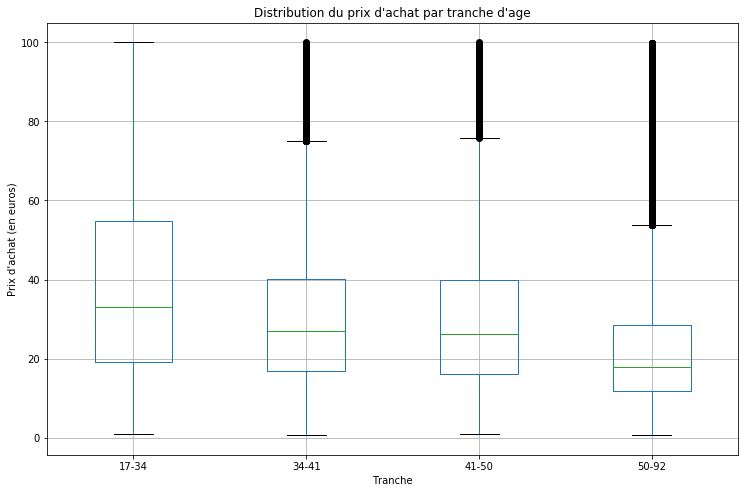

In [93]:
# Box plot du montant du panier par tranche d'âge

boxplot_price_panier_trancheage = achat_session[achat_session.ca_session < PRIXLIMIT].boxplot(column=['ca_session'], by='tranche_age', figsize=(12,8))
boxplot_price_panier_trancheage.set_ylabel('Prix')
plt.title("Distribution du prix d'achat par tranche d'age")
plt.xlabel("Tranche")
plt.ylabel("Prix d'achat (en euros)")
plt.suptitle("")

In [94]:
#Correlation entre age et frequence achat par mois
freq_achat = dataset_transac_analyse.groupby(['id_client','id_session','tranche_age', 'age', dataset_transac_analyse.date.dt.strftime('%Y-%m')]).size().reset_index()
freq_achat.columns = ['id_client','id_session', 'tranche_age','age','mois','freq_achat']
freq_achat.head()

,id_client,id_session,tranche_age,age,mois,freq_achat
0,c_1,s_114737,50-92,66,2021-11,5
1,c_1,s_120172,50-92,66,2021-11,2
2,c_1,s_134971,50-92,66,2021-12,1
3,c_1,s_136532,50-92,66,2021-12,1
4,c_1,s_139610,50-92,66,2021-12,1


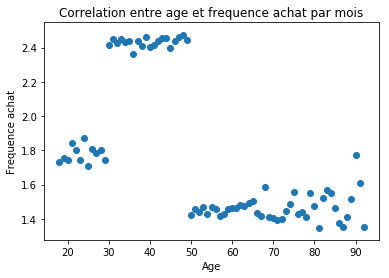

In [95]:
freq_achat_mean = freq_achat[['age', 'tranche_age','freq_achat']].groupby(['age', 'tranche_age']).mean().reset_index()
freq_achat_mean = freq_achat_mean.dropna()
x = freq_achat_mean['age']
y = freq_achat_mean['freq_achat']
plt.scatter(x, y) 
plt.xlabel("Age")
plt.ylabel("Frequence achat")
plt.title("Correlation entre age et frequence achat par mois")
plt.show()

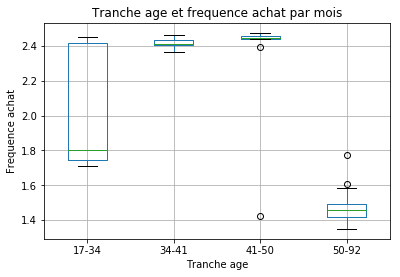

In [96]:
freq_achat_mean.boxplot(column=['freq_achat'], by='tranche_age')
plt.title("Tranche age et frequence achat par mois")
plt.xlabel("Tranche age")
plt.ylabel("Frequence achat")
plt.suptitle("")
plt.show()

Text(0.5, 1.0, "Nombre achat par mois et par tranche d'âge")

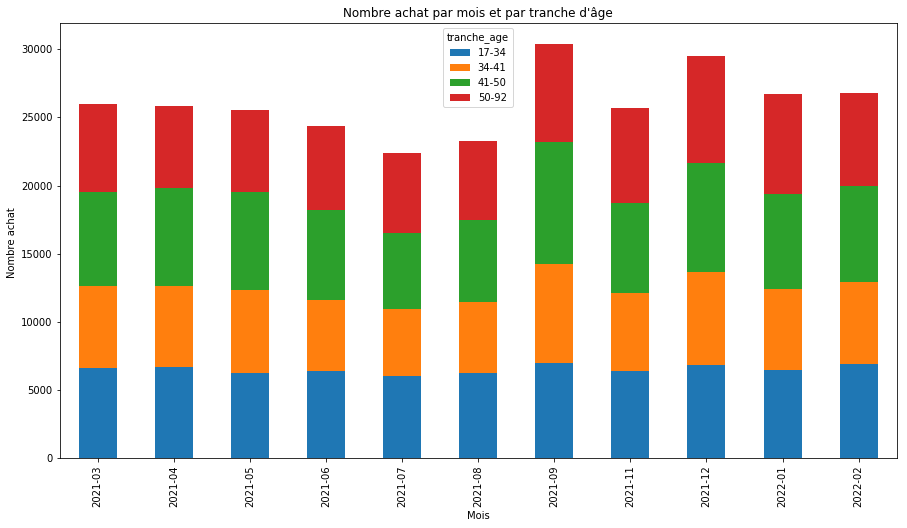

In [97]:
# Nombre d'achats par par mois, par tranche d'age
nb_achat_tranche_age_mois = dataset_transac_analyse.groupby([dataset_transac_analyse.date.dt.strftime('%Y-%m'), "tranche_age"]).size()
nb_achat_tranche_age_mois.unstack().plot(kind='bar', stacked=True,figsize=[15,8] )
plt.xlabel("Mois")
plt.ylabel("Nombre achat ")
plt.title("Nombre achat par mois et par tranche d'âge")

# Visualisation de series temporelles

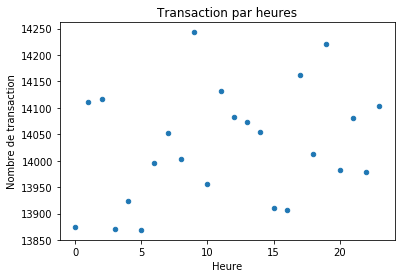

In [98]:
# Transaction par heure de la semaine
hour_viz = pd.DataFrame(data.groupby(data.date.dt.hour).size().reset_index())
hour_viz.columns = ["Heure", "Nombre de transaction"]

hour_viz.plot.scatter(x='Heure', y='Nombre de transaction', title= "Transaction par heures")


## Saisonnalité des ventes de produits

In [99]:
data.head()

,id_produit,date,id_session,id_client,genre,a_naissance,prix,categorie,annee_mois,age,tranche_age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0,2021-04,44,41-50
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0,2022-02,21,17-34
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0,2021-09,42,41-50
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0,2021-10,58,50-92
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0,2021-07,41,34-41


### Ventes par mois et par categorie

In [100]:
# tableau de contingence :
X = "annee_mois"
Y = "categorie"

c = dataset_transac_analyse[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
ca_categ = c.copy()

tx = dataset_transac_analyse[X].value_counts()
ty = dataset_transac_analyse[Y].value_counts()
ca_categ['Total'] = tx
ca_categ.loc['total'] = ty
ca_categ.loc["total","Total"] = len(dataset_transac_analyse)
ca_categ

categorie,0.0,1.0,2.0,Total
annee_mois,,,,
2021-03,16896.0,8542.0,1169.0,26607.0
2021-04,18024.0,7061.0,1343.0,26428.0
2021-05,17160.0,7591.0,1473.0,26224.0
2021-06,14816.0,8699.0,1493.0,25008.0
2021-07,12687.0,8569.0,1793.0,23049.0
2021-08,14695.0,7470.0,1752.0,23917.0
2021-09,21487.0,8643.0,789.0,30919.0
2021-11,13532.0,11503.0,1244.0,26279.0
2021-12,17933.0,11451.0,784.0,30168.0


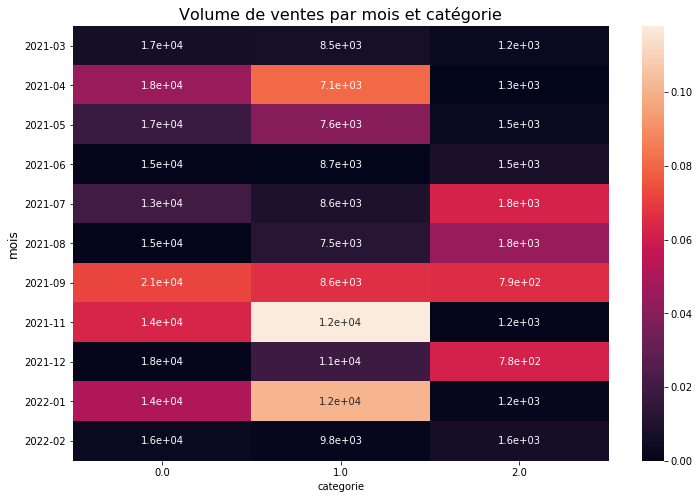

In [101]:
# tableau de contingence coloré :
plt.figure(figsize=(12,8))
tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)
tx.columns = ["foo"]
ty.columns = ["foo"]
n = len(dataset_transac_analyse)
indep = tx.dot(ty.T) / n

c = c.fillna(0) # on remplace les valeurs nulles par des 0
mesure = (c-indep)**2/indep
xi_n = mesure.sum().sum()
sns.heatmap(mesure/xi_n,annot=c)
plt.ylabel("mois", size=12)
plt.title("Volume de ventes par mois et catégorie", size = 16)
plt.show()

### Chi-2 - Categorie et mois

In [102]:
import researchpy as rp
crosstab, test_results, expected = rp.crosstab(dataset_transac_analyse["annee_mois"],
                                               dataset_transac_analyse["categorie"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab


categorie                     
                 0.0    1.0   2.0     All
annee_mois                               
2021-03         5.76   2.91  0.40    9.06
2021-04         6.14   2.41  0.46    9.00
2021-05         5.85   2.59  0.50    8.93
2021-06         5.05   2.96  0.51    8.52
2021-07         4.32   2.92  0.61    7.85
2021-08         5.01   2.55  0.60    8.15
2021-09         7.32   2.94  0.27   10.53
2021-11         4.61   3.92  0.42    8.95
2021-12         6.11   3.90  0.27   10.28
2022-01         4.90   4.00  0.43    9.33
2022-02         5.50   3.33  0.55    9.38
All            60.56  34.43  5.01  100.00

In [103]:
test_results


,Chi-square test,results
0,Pearson Chi-square ( 20.0) =,5652.8004
1,p-value =,0.0000
2,Cramer's V =,0.0981


In [104]:
##### Avec le seuil de confiance 95% (alpha=0,05) ,
##### p-value < 0,05 & cramer's V < 0,05,
##### il y a une corrélation entre le mois et chaque catégories

## Saisonnalite des ventes par semaines/mois

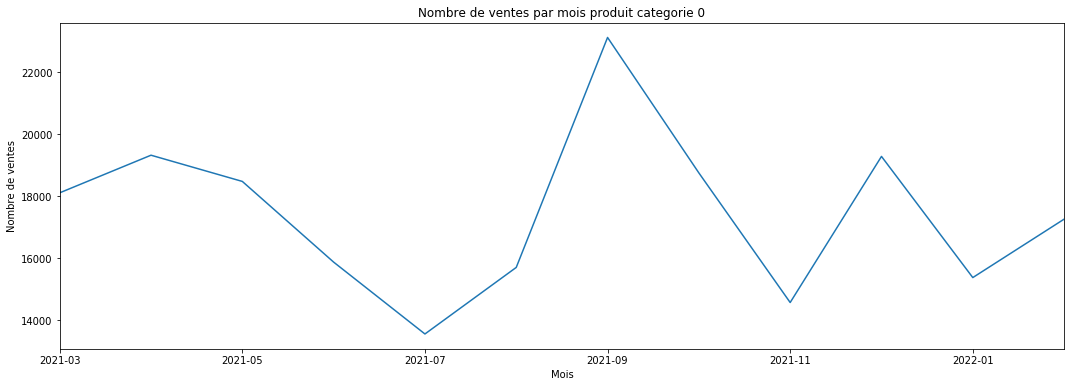

In [105]:
# Saisonnalité ventes produit categ 0.0 
saisonalite_vente_mois_categ0 = data[data['categorie'] =='0.0'].groupby(data.date.dt.strftime('%Y-%m')).size()
saisonalite_vente_mois_categ0.plot(figsize=(18, 6))
plt.xlabel("Mois")
plt.ylabel("Nombre de ventes")
plt.title("Nombre de ventes par mois produit categorie 0")
pyplot.show()

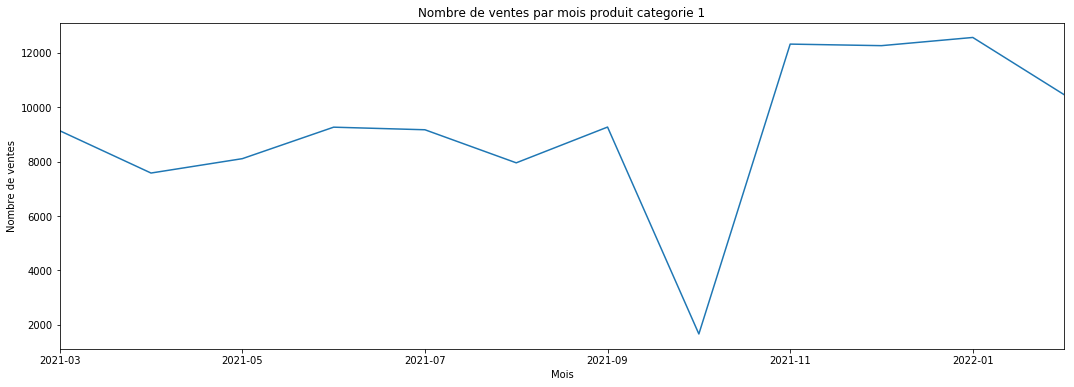

In [106]:
# Saisonnalité ventes produit categ 1
saisonalite_vente_mois_categ0 = data[data['categorie'] =='1.0'].groupby(data.date.dt.strftime('%Y-%m')).size()
saisonalite_vente_mois_categ0.plot(figsize=(18, 6))
plt.xlabel("Mois")
plt.ylabel("Nombre de ventes")
plt.title("Nombre de ventes par mois produit categorie 1")
pyplot.show()

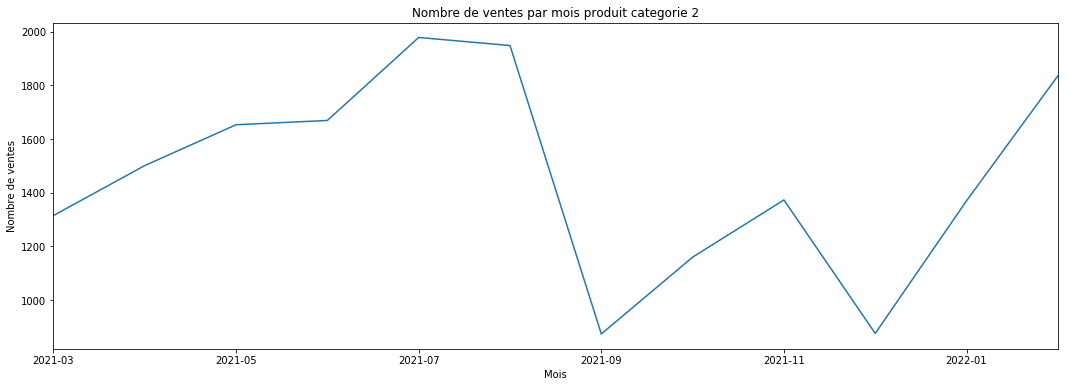

In [107]:
# Saisonnalité ventes produit categ 2
saisonalite_vente_mois_categ0 = data[data['categorie'] =='2.0'].groupby(data.date.dt.strftime('%Y-%m')).size()
saisonalite_vente_mois_categ0.plot(figsize=(18, 6))
plt.xlabel("Mois")
plt.ylabel("Nombre de ventes")
plt.title("Nombre de ventes par mois produit categorie 2")
pyplot.show()